#**Tarea 1 - COM4001 Minería de Datos**
*Resolución por Vicente González Saldivia, entregado en Abril de 2022.*

##**Configuraciones iniciales**

A continuación se establecerá el repositorio de `GitHub` que dispone de los archivos a utilizar, además de importar las librerías necesarias para buena parte de este trabajo.

Además se utilizarán los archivos de datos proporcionados por el enunciado, siendo su contenido interpretado por la función `read_csv` y posteriormente almacenado en variables globales.

Para la correcta funcionalidad de todos los programas presentes en este trabajo, el siguiente código deberá ser ejecutado primero. De igual manera para una mayor seguridad en la recepción de los resultados que arrojan los códigos de este documento, se recomienda ejecutarlos todos mediante la combinación `Ctrl+F9`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

REPO = "https://raw.githubusercontent.com/Vicente-G/data-mining/main/"

RED_DATA = pd.read_csv(REPO + "red_wine.csv", sep = ";")
WHITE_DATA = pd.read_csv(REPO + "white_wine.csv", sep = ";")
DIAMOND_DATA = pd.read_csv(REPO + "diamond.csv", sep = ",")

##**Parte 1**

Como se pudo observar en la configuración inicial, pudimos obtener los datos gracias a la función `read_csv` de la librería pandas. Para esta primera parte, utilizaremos los primeros 2 conjuntos de datos.

Para comprender el contexto de los datos, observaremos la cantidad de entradas, así como los atributos a evaluar.

In [3]:
red_attributes = list(RED_DATA.columns)
white_attributes = list(WHITE_DATA.columns)

red_elements = len(RED_DATA[red_attributes[0]])
white_elements = len(WHITE_DATA[white_attributes[0]])

print(f"En los datos de vino tinto encontramos {red_elements} instancias.")
print(f"Ademas observamos {len(red_attributes)} atributos, los cuales son: {', '.join(red_attributes)}.")

print(f"\nEn los datos de vino blanco encontramos {white_elements} instancias.")
print(f"Ademas observamos {len(white_attributes)} atributos, los cuales son: {', '.join(white_attributes)}.")

En los datos de vino tinto encontramos 1599 instancias.
Ademas observamos 12 atributos, los cuales son: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality.

En los datos de vino blanco encontramos 4898 instancias.
Ademas observamos 12 atributos, los cuales son: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality.


Con el fin de analizar levemente el estado inicial de los datos, observaremos algunas medidas de tendencia central, dispersión y posición. A continuación definimos unas funciones que equivalen a los procedimientos solicitados y los utilizaremos a modo de comparación con los métodos ya implementados en las librerías importadas. Esto no solo con el fin de adquirir seguridad sobre nuestros resultados, sino también a modo de demostrar la validez de las librerías utilizadas, puesto que como se observará más adelante, los resultados son muy similares.

Ya que se solicita implementar los procedimientos, a continuación se encuentra implementado un algoritmo de ordenamiento conocido como merge sort, elegido debido a su complejidad ideal en los algoritmos basados en comparaciones, este algoritmo será de gran utilidad para obtener medidas de posición.

In [4]:
def merge(data_a, data_b):
    result = []
    counter_a, counter_b = 0, 0
    while (len(result) < (len(data_a) + len(data_b))):
        if ((counter_a == len(data_a)) or (counter_b == len(data_b))):
            result = result + data_a[counter_a:] + data_b[counter_b:]
        elif (data_a[counter_a] < data_b[counter_b]):
            result.append(data_a[counter_a])
            counter_a += 1
        else:
            result.append(data_b[counter_b])
            counter_b += 1
    return result

def merge_sort(data):
    if (len(data) < 2):
        return list(data)
    mid = len(data) // 2
    return merge(merge_sort(data[:mid]), merge_sort(data[mid:]))

# Las medidas de posicion requieren de los datos ordenados
def minimum(data):
    return data[0]
def maximum(data):
    return data[-1]
def median(data):
    mid = len(data) // 2
    draw = (data[mid] + data[mid + 1]) / 2
    return draw if len(data) % 2 else data[mid]

def mean(data):
    total = 0
    for x in data:
        total += x
    return total / len(data)

def std_dev(data):
    data_mean = mean(data)
    total = 0
    for x in data:
        total += (x - data_mean) ** 2
    return (total / (len(data) - 1)) ** 0.5

Si analizamos los algoritmos anteriores, podremos observar que intuitivamente codifican la solución al problema de obtención de los datos solicitados. 

Igualmente, para corroborar los resultados de forma sencilla y ordenada, tomaremos prestada la implementación de la clase `DataFrame` de pandas, que dispone de una interpretación en formato tabla por parte de Google Colab.

A continuación guardo los resultados para ambos conjuntos de datos en las variables de las líneas 12 y 13.

In [5]:
def measurements(dataframe):
    prev, rows = {}, ["promedio", "desviacion", "minimo", "mediana", "maximo"]
    for attr in dataframe.columns:
        sorted_data = merge_sort(dataframe[attr])
        prev[attr] = [mean(dataframe[attr]),
                      std_dev(dataframe[attr]),
                      minimum(sorted_data),
                      median(sorted_data),
                      maximum(sorted_data)]
    return pd.DataFrame(prev, rows)

RED_MEASUREMENTS = measurements(RED_DATA)
WHITE_MEASUREMENTS = measurements(WHITE_DATA)

De esta forma en los códigos a continuación podremos comparar uno a uno los resultados de las implementaciones anteriores con los resultados del método `describe` de la clase `DataFrame`, pudiendo observar que los resultados son incluso idénticos.

In [6]:
RED_MEASUREMENTS

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
promedio,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
desviacion,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
minimo,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
mediana,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
maximo,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
RED_DATA.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
WHITE_MEASUREMENTS

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
promedio,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
desviacion,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
minimo,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
mediana,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
maximo,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
WHITE_DATA.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Pero estos resultados no son idénticos cuando se calculan estos datos con la librería numpy, una prueba de ello sería correr el siguiente código y comparar el resultado con los obtenidos anteriormente.

In [10]:
np.std(RED_DATA["fixed acidity"])

1.7405518001102782

Mi conjetura sobre esto es que la librería numpy utiliza sus propias estructuras de datos, con distintas implementaciones en lo que a punto flotante se refiere, por lo que esto causaría diferencias con respecto a los tipos de datos usados por Python y pandas.

---

Para explicar en que consiste la matriz de covarianza, comenzaremos por recordar que es una covarianza. El concepto de covarianza nos sirve para analizar la variabilidad conjunta entre dos muestras en relación a sus propios promedios, por lo que se podría entender como una medida de dispersión relativa entre dos variables. Está dada por la fórmula:

$$Cov(𝑋, 𝑌)\space=\space\frac{\sum^{n}_{i=0}{((x_i\space-\space\overline{x})⋅(y_i\space-\space\overline{y}))}}{n}$$

La matriz de covarianza nos permite observar las varianzas de cada columna en la diagonal de la matriz, ya que sería la covarianza de la columna consigo misma, e intuitivamente lo que observaremos en el resto de la matriz son las covarianzas que existen entre una columna y las demás.

Como se habrá deducido de la definición anterior, la matriz de covarianza cumple con ciertas características:

*   La matriz siempre es cuadrada, con una dimensión de la forma:

$$\#columnas\space𝗑\space\#columnas$$

*   El triángulo inferior de la matriz será redundante en consideración al triángulo superior. Esto pues la covarianza entre las columnas X e Y, es equivalente a la covarianza entre las columnas Y e X.

Como en las definiciones anteriores pudimos calcular las desviaciones estándar de cada columna, no se nos debiera hacer extraño que el procedimiento para calcular una covarianza sea similar. Pero como no se requiere de implementación para este apartado, simplemente utilizaremos el método `cov` de la clase `DataFrame` que nos permite conocer la matriz de covarianza de nuestros datos al instante.


In [11]:
RED_DATA.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


In [12]:
WHITE_DATA.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volatile acidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citric acid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
residual sugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062
free sulfur dioxide,-0.708919,-0.166300,0.193630,25.800578,0.037674,289.242720,444.865891,0.014966,-0.001587,0.114938,-5.234509,0.122878
total sulfur dioxide,3.266013,0.382354,0.622989,86.531303,0.184687,444.865891,1806.085491,0.067352,0.014894,0.652645,-23.476605,-6.576746
density,0.000670,0.000008,0.000054,0.012727,0.000017,0.014966,0.067352,0.000009,-0.000042,0.000025,-0.002871,-0.000814
pH,-0.054265,-0.000486,-0.002992,-0.148684,-0.000298,-0.001587,0.014894,-0.000042,0.022801,0.002688,0.022565,0.013297
sulphates,-0.001651,-0.000411,0.000861,-0.015435,0.000042,0.114938,0.652645,0.000025,0.002688,0.013025,-0.002448,0.005425


##**Parte 2**

En esta parte continuaremos usando los datos anteriores, pero comenzaremos a utilizarlos para generar información. Ya obtuvimos algunas medidas de los datos, pero sería de utilidad comenzar a observar como se comportan estos mismos. Para ello, comenzaremos por visualizar la información de forma gráfica, cosa que nos podría permitir entre algunas cosas, clasificar los datos bajo alguna distribución simétrica o asimétrica.

Con el objetivo en mente, comenzamos por facilitar la generación de un histograma. Para ello agruparemos los datos en intervalos, esto mediante el posterior uso de las siguientes definiciones:

In [13]:
def get_min_max(description, attribute):
    return (description[attribute]["minimo"],
            description[attribute]["maximo"])

def group(data, min_value, max_value, bins):
    dist = np.zeros(bins)
    step = (max_value - min_value) / (bins)
    for x in data:
        which = int((x - min_value) / step)
        if (which >= bins):
            which = bins - 1
        dist[which] += 1
    return dist

def make_groups(dataframe, description, bins):
    groups = {}
    for attr in dataframe.columns:
        min_value, max_value = get_min_max(description, attr)
        f = (max_value - min_value) / (bins)
        groups[attr] = [np.linspace(min_value + (f / 2), max_value - (f / 2), bins)]
        groups[attr].append(group(dataframe[attr], min_value, max_value, bins))
    return groups

Como se pudo observar, en la primera función reutilizamos la información obtenida en la parte 1 para adquirir el mínimo y máximo sin mayor costo de cómputo. Luego, la función `group` genera los bins a utilizar en un histograma a partir de una columna y algunos parámetros. Finalmente, la función `make_groups` itera por el conjunto de datos para retornar los bins y sus respectivos tamaños para cada atributo.

Más adelante se define la función solicitada por el enunciado, bajo el nombre de `histogram`, sin embargo para el desarrollo de este trabajo se utilizará la función `make_hists`, pues permite una visión más ordenada y acotada de los histogramas.

Además guardaremos en variables los datos requeridos para la función `make_hists` bajo la condición de usar 20 bins, tal como fue solicitado en el enunciado.

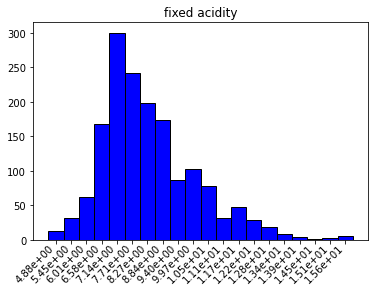

In [130]:
def histogram(dataframe, attribute, bins):
    data = dataframe[attribute]
    min_value, max_value = min(data), max(data)
    f = (max_value - min_value) / (bins)
    x = np.linspace(min_value + (f / 2), max_value - (f / 2), bins)
    y = group(data, min_value, max_value, bins)
    z = [f"{j:.2e}" for i, j in enumerate(x)]
    plt.bar(x, y, x[1] - x[0], edgecolor = "k", color = "b")
    plt.xticks(x, z, rotation=45, ha="right", va="center_baseline")
    plt.title(attribute)

def make_hists(groups):
    plt.figure(figsize = (20, 13))
    plt.subplots_adjust(hspace = 0.33)
    for i, attr in enumerate(groups):
        plt.subplot(3, 4, i + 1)
        step = groups[attr][0][1] - groups[attr][0][0]
        z = [f"{j:.2e}" for i, j in enumerate(groups[attr][0])]
        plt.bar(groups[attr][0], groups[attr][1], step, edgecolor = "k", color = "b")
        plt.xticks(groups[attr][0], z, rotation=45, ha="right", va="center_baseline")
        plt.title(attr)

RED_GROUPS = make_groups(RED_DATA.loc[:, RED_DATA.columns != 'quality'], RED_MEASUREMENTS, 20)
WHITE_GROUPS = make_groups(WHITE_DATA.loc[:, WHITE_DATA.columns != 'quality'], WHITE_MEASUREMENTS, 20)
#RED_DATA["fixed acidity"].hist(bins = 20) # Testing if the histogram is correct
histogram(RED_DATA, "fixed acidity", 20)

A continuación podremos observar los gráficos para el conjunto de vino tinto, y posteriormente para el conjunto de vino blanco.

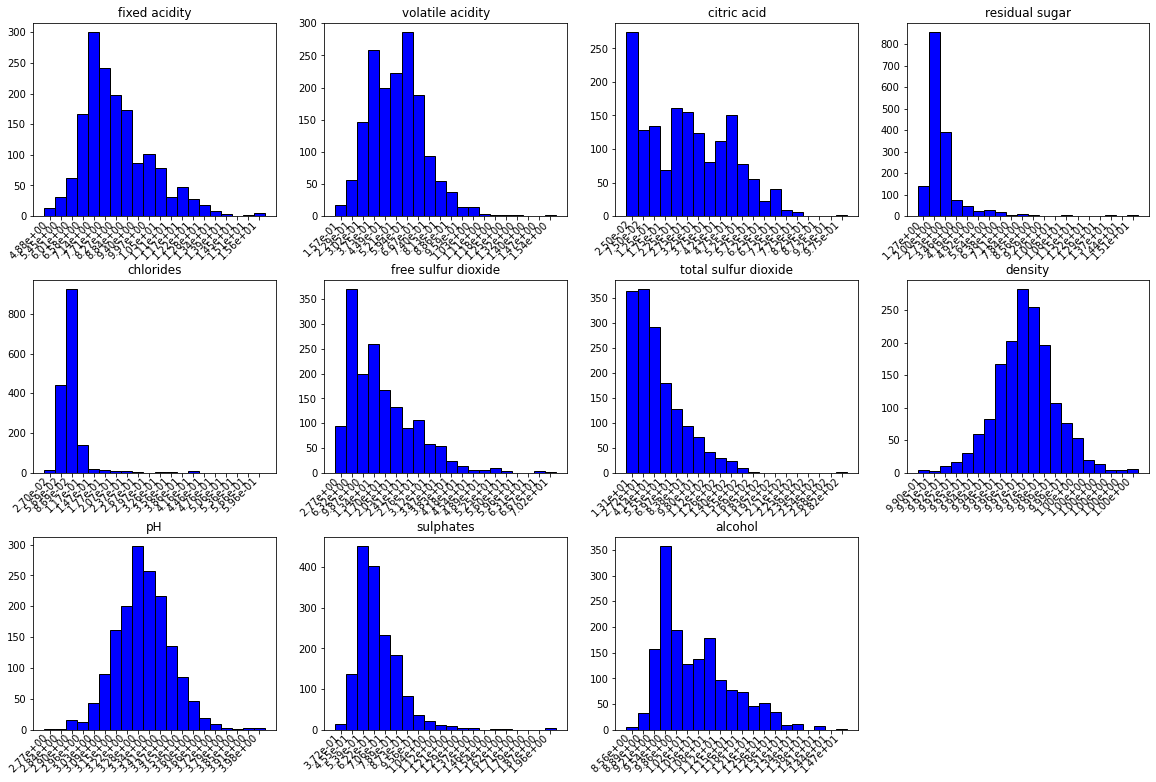

In [131]:
make_hists(RED_GROUPS)

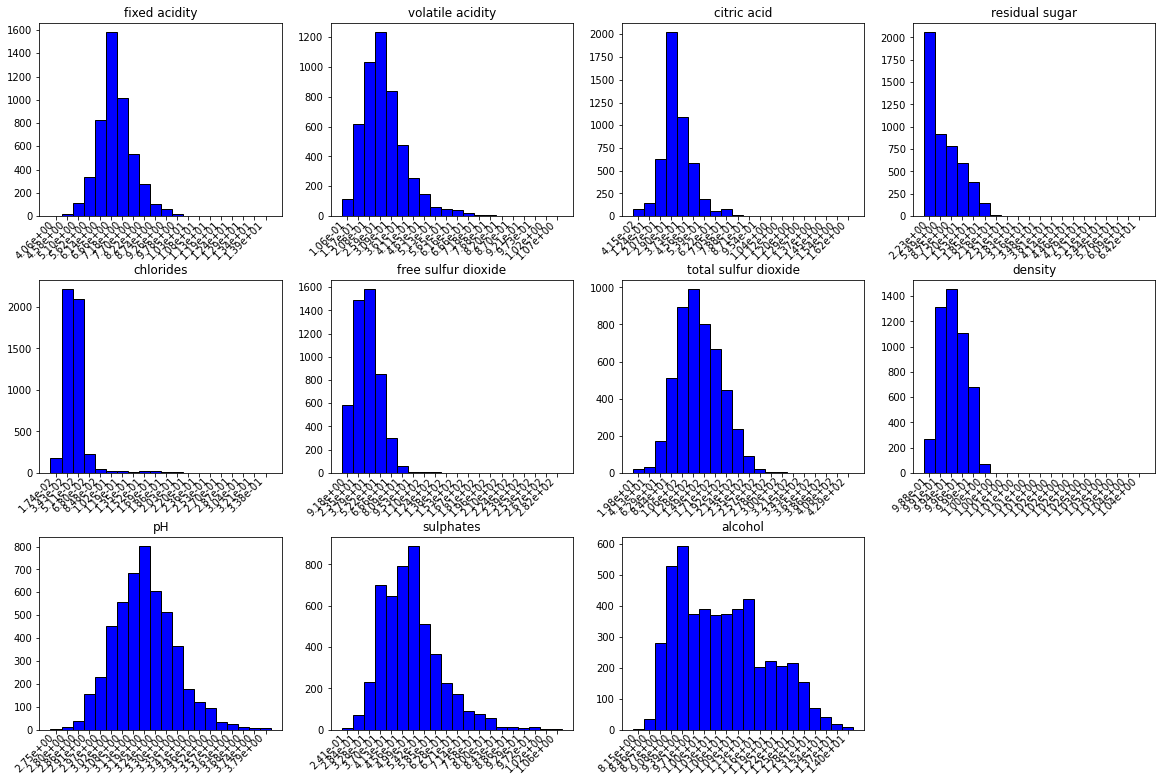

In [132]:
make_hists(WHITE_GROUPS)

Dada la existencia de un sinnúmero de distribuciones bajo las cuales se pueden comportar los datos, tomaremos en consideración solo algunas de las distribuciones vistas en el curso de probabilidad y estadística. Estas son las distribuciones Gamma, las Beta y la Normal. La fama de la distribución Normal la precede, por lo que no consideramos que haga falta explicar más allá de que esta sigue una curva gaussiana. La distribución Gamma en cambio, tiende a seguir una forma asimétrica, por lo que su comportamiento es similar al de una curva exponencial, de hecho un caso particular de esta distribución es conocida como distribución exponencial por la misma razón. Por último, la distribución Beta tiene comportamientos diversos dependiendo del valor de sus coeficientes, pero para efectos prácticos, consideraremos los casos en que la distribución Beta se comporta diferente de la distribución Gamma, ya que con algunos valores, la distribución Beta puede ser similar a una exponencial.

Tomando estas 3 distribuciones para clasificar los atributos tal que así:

Atributos de vino tinto: `fixed acidity` como Beta, `volatile acidity` como Beta, `citric acid` como Beta, `residual sugar` como Gamma, `chlorides` como Gamma, `free sulfur dioxide` como Gamma, `total sulfur dioxide` como Gamma, `density` como Normal, `pH` como Normal, `sulphates` como Gamma y `alcohol` como Beta.

Atributos de vino blanco: `fixed acidity` como Normal, `volatile acidity` como Gamma, `citric acid` como Normal, `residual sugar` como Gamma, `chlorides` como Gamma, `free sulfur dioxide` como Gamma, `total sulfur dioxide` como beta, `density` como Gamma, `pH` como Normal, `sulphates` como Beta y `alcohol` como beta.

Comparando ambos conjuntos, se puede observar que los vinos blancos son más ácidos en `pH` que los vinos tintos, caso contrario en su sabor, basándonos que en que el atributo `volatile acidity` nos permite no solo determinar propiedades químicas del vino, sino que también su grado de acidez.

Además la cantidad favorable de `residual sugar` y `density` en vinos blancos nos permiten saber que estos tienden a ser más dulces que los vinos tintos. Finalmente, podemos observar también que los vinos blancos son más fuertes en cuanto a su concentración de alcohol, tanto por el mismo atributo de alcohol como por su densidad que se eleva por sobre la de los vinos tintos.

---

Como pudimos observar en la evaluación anterior, no tomamos en cuenta el atributo `quality`, por lo que a continuación le daremos un propósito en esta evaluación. Como los datos son discretos, ya que consisten en puntajes definiremos 3 subconjuntos entre los cuales clasificaremos cada una de las entradas. A simple vista esto no resulta muy diferente de separar este atributo en 3 bins, bajo la lógica anterior, pero en este caso no buscamos intervalos de igual rango, además estableceremos un valor cualitativo según la calificación obtenida. La calificación iría así:

*   `quality <= 4` será un Vino Malo
*   `quality >= 7` será un Vino Bueno
*   Y el resto será un Vino Normal

In [17]:
def add_category(dataframe):
    new_category = []
    for x in dataframe["quality"]:
        if x <= 4:
            new_category.append("Vino Malo")
        elif x >= 7:
            new_category.append("Vino Bueno")
        else:
            new_category.append("Vino Normal")
    dataframe["categoria"] = new_category
    return dataframe

RED_DATA_CAT = add_category(RED_DATA.copy())
WHITE_DATA_CAT = add_category(WHITE_DATA.copy())

Con la nueva columna cualitativa agregada en ambos conjuntos, ahora podemos satisfacer la solicitud del enunciado. Por ello, contaremos cada repetición de cada calificación, obteniendo así la cantidad de cada una, y utilizando dicho resultado podemos representarlo como porcentaje mediante una conversión simple.

In [18]:
def count_category(dataframe, attribute, values):
    result = [0 for x in values] + [0]
    for x in dataframe[attribute]:
        if (x in values):
            result[values.index(x)] += 1
        else:
            result[-1] += 1
    return result

values = ["Vino Malo", "Vino Normal", "Vino Bueno"]
red_result = count_category(RED_DATA_CAT, "categoria", values)
white_result = count_category(WHITE_DATA_CAT, "categoria", values)

print(f"Para vinos tintos:\nHay {red_result[0]} vinos malos, {red_result[1]} vinos normales y {red_result[2]} vinos buenos.")
print(f"El {red_result[0]/sum(red_result)*100}% son vinos malos, {red_result[1]/sum(red_result)*100}% son vinos normales y {red_result[2]/sum(red_result)*100}% son vinos buenos.")

print(f"\nPara vinos blancos:\nHay {white_result[0]} vinos malos, {white_result[1]} vinos normales y {white_result[2]} vinos buenos.")
print(f"El {white_result[0]/sum(white_result)*100}% son vinos malos, {white_result[1]/sum(white_result)*100}% son vinos normales y {white_result[2]/sum(white_result)*100}% son vinos buenos.")

Para vinos tintos:
Hay 63 vinos malos, 1319 vinos normales y 217 vinos buenos.
El 3.9399624765478425% son vinos malos, 82.48905565978737% son vinos normales y 13.570981863664791% son vinos buenos.

Para vinos blancos:
Hay 183 vinos malos, 3655 vinos normales y 1060 vinos buenos.
El 3.7362188648427925% son vinos malos, 74.62229481420988% son vinos normales y 21.641486320947326% son vinos buenos.


Salta a la vista gracias a la medida relativa que otorgan los porcentajes, que entre los vinos blancos hay un mayor número de vinos buenos en comparación a los vinos tintos. Igualmente, cabe mencionar la diferencia en el tamaño de ambas muestras, lo que podría implicar que la medida relativa en el caso de los vinos tintos, sea menos fiable dada la cantidad de entradas, por lo que la conclusión anterior se basa en el supuesto de que las muestras sacadas son representativas en ambos casos.

---

Siguiendo las solicitudes por parte del enunciado, ahora observaremos la dispersión de los datos, en particular los gráficos para algunos casos particulares, siendo estos la dispersión de 2 variables que se comporten de forma normal, y tanto la mínima, como la máxima diferencia de los datos mediante la matriz de covarianza previamente calculada.

A continuación observaremos la relación entre 2 variables de comportamiento normal, separando mediante colores el comportamiento de las muestras según la clasificación establecida en el punto anterior. Para un uso eficiente de la codificación, definimos una función para mostrar gráficos de dispersión a partir de 2 atributos dados.

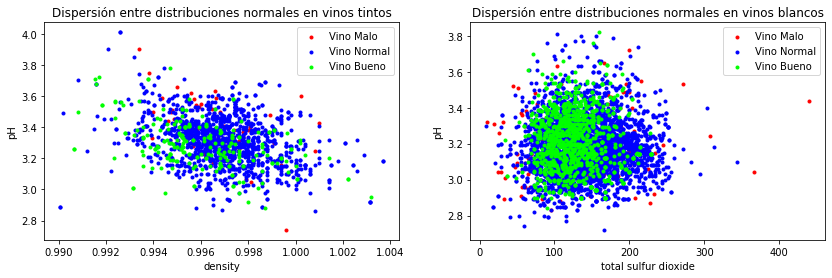

In [142]:
def dispersion(dataframe, attr1, attr2, title):
    malo = dataframe[dataframe["categoria"] == "Vino Malo"]
    normal = dataframe[dataframe["categoria"] == "Vino Normal"]
    bueno = dataframe[dataframe["categoria"] == "Vino Bueno"]
    plt.scatter(malo[attr1], malo[attr2], color = "r", marker = ".", label = "Vino Malo")
    plt.scatter(normal[attr1], normal[attr2], color = "b", marker = ".", label = "Vino Normal")
    plt.scatter(bueno[attr1], bueno[attr2], color = "lime", marker = ".", label = "Vino Bueno")
    plt.title(title)
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.legend(loc="best")

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
title = "Dispersión entre distribuciones normales en vinos tintos"
dispersion(RED_DATA_CAT, "density", "pH", title)
plt.subplot(1, 2, 2)
title = "Dispersión entre distribuciones normales en vinos blancos"
dispersion(WHITE_DATA_CAT, "total sulfur dioxide", "pH", title)

Como se puede ver los datos se encuentran muy poco dispersos entre sí, cosa esperable dado el comportamiento normal de que los valores extremos son escazos. En particular, la combinación `density` y `pH` en vinos tintos se observan incluso menos dispersos que la combinación de vinos blancos. Esto probablemente ocurra dado que la distribución normal observada en el atributo `total sulfur dioxide` muestra una media desfazada, lo que se representa por su forma ligeramente asímetrica en los histogramas anteriores.

Para continuar con las comparaciones en gráficos de dispersión asociadas a las covarianzas entre atributos, he empleado el siguiente algoritmo capaz de retornar el valor absoluto mínimo y máximo, mediante la extracción del triángulo superior de la matriz (para no considerar la diagonal) y su posterior análisis con las funciones `min` y `max`.

In [23]:
def cov_min_max(dataframe):
    triangle = np.triu_indices(12, k = 1)
    lst = np.array(np.matrix(dataframe.cov())[triangle]).tolist()
    abs_lst = list(map(abs, lst[0]))
    return min(abs_lst), max(abs_lst)

print(f"El mínimo valor absoluto de la matriz de covarianza para vinos tintos es: {cov_min_max(RED_DATA)[0]:.6f}")
print(f"El máximo valor absoluto de la matriz de covarianza para vinos tintos es: {cov_min_max(RED_DATA)[1]:.6f}")

print(f"\nEl mínimo valor absoluto de la matriz de covarianza para vinos blancos es: {cov_min_max(WHITE_DATA)[0]:.6f}")
print(f"El máximo valor absoluto de la matriz de covarianza para vinos blancos es: {cov_min_max(WHITE_DATA)[1]:.6f}")

El mínimo valor absoluto de la matriz de covarianza para vinos tintos es: 0.000007
El máximo valor absoluto de la matriz de covarianza para vinos tintos es: 229.737521

El mínimo valor absoluto de la matriz de covarianza para vinos blancos es: 0.000008
El máximo valor absoluto de la matriz de covarianza para vinos blancos es: 444.865891


En base al resultado obtenido, buscamos los elementos en la matriz de convarianzas de cada conjunto de datos y nos encontramos con la curiosidad de que en ambos casos, el par de atributos que presentan la menor covarianza, así como la mayor, son los mismos. Siendo los atributos `density` y `volatile acidity` los que presentan el menor valor absoluto entre las covarianzas previamente obtenidas, tanto para vinos tintos como blancos, y lo mismo ocurre, pero maximizando el valor absoluto de su covarianza, con los atributos `free sulfur dioxide` y `total sulfur dioxide`.

Con eso en mente, observamos los gráficos de dispersión para vinos tintos, y luego los de vinos blancos.

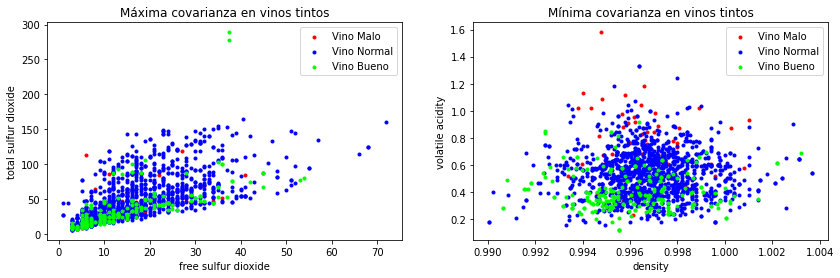

In [24]:
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
title = "Máxima covarianza en vinos tintos"
dispersion(RED_DATA_CAT, "free sulfur dioxide", "total sulfur dioxide", title)
plt.subplot(1, 2, 2)
title = "Mínima covarianza en vinos tintos"
dispersion(RED_DATA_CAT, "density", "volatile acidity", title)

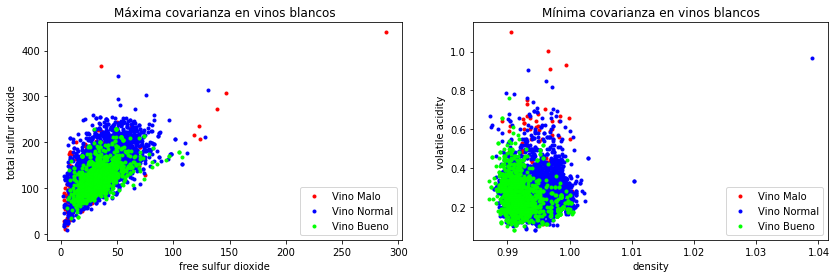

In [25]:
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
title = "Máxima covarianza en vinos blancos"
dispersion(WHITE_DATA_CAT, "free sulfur dioxide", "total sulfur dioxide", title)
plt.subplot(1, 2, 2)
title = "Mínima covarianza en vinos blancos"
dispersion(WHITE_DATA_CAT, "density", "volatile acidity", title)

En ambos casos de covarianza mínima, se observa únicamente que los datos son cercanos entre sí, comportamiento similar al que encontramos analizando la correlación entre dos distribuciones normales.

En cambio, en ambos casos de covarianza máxima, podemos observar que hay un comportamiento ascendente simultáneamente de ambas variables, si bien a simple vista no podemos determinar con exactitud la razón en la que crecen comparativamente, si podemos notar que hay un crecimiento levemente mayor por parte del atributo `total sulfur dioxide`, observación que puede deberse únicamente a un asunto de escala, o quizás a una razón que sobrepase el crecimiento lineal.

Luego de haber analizado estos gráficos de dispersión, podemos concluir que los atributos de los primeros 4 gráficos observados tienden a una baja dispersión de los datos, pudiendo fácilmente establecer un estándar de cuál es el comportamiento promedio de dichos atributos con una buena precisión. Y también, pudimos notar que hay al menos una relación de directa proporcionalidad entre los atributos de máxima covarianza.

---

##**Parte 3**

En esta parte, utilizaremos el set de datos restante que importamos al comienzo de este trabajo. Este conjunto contempla una muestra de diamantes, observándose algunas de sus características de la perspectiva de que es una joya, así como otras características físicas.

Antes de comenzar a analizar los datos, explicaremos el marco teórico del próximo estudio.

Para analizar los datos, estaremos utilizando algunos conceptos relacionados a el uso de distancias para la clasificación de la información. Con eso dicho, comenzaremos a analizar algunas fórmulas de distancia conocidas:

$$Euclidiana(x, y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$$

La distancia euclidiana resta uno a uno cada componente de los vectores implicados y eleva dicha distancia al cuadrado, esto con el fin de que al sumar los valores no se compensen unos a otros, sino que todos sean considerados para el total. Una vez se han operado todos los componentes de ambos vectores, se saca la raíz cuadrada de este total con el fin de compensar la potenciación al cuadrado que se hizo componente a componente.

$$Minkowski(x, y, r) = \sqrt[r]{\sum_{i=1}^{n}{|x_i - y_i|^r}}$$

Como se puede ver, la distancia minkowski no es muy diferente de la euclidiana, y esto es porque corresponde a una generalización de esta para un índice r, por ello su fórmula es esencialmente lo mismo, solo que la diferencia componente a componente perderá su signo mediante un valor absoluto, ya que se busca conservar el aporte de cada componente a la distancia total y un r no par no puede asegurar esto. 

$$Mahalanobis(x, y, S) = \sqrt{(x - y)·S^{-1}·(x - y)^T}$$

Finalmente, observaremos también la fórmula de la distancia mahalanobis, la que cuenta con un argumento S que representa la matriz de covarianza para los atributos utilizados en ambos vectores x e y. Ahora, como se podrá haber observado, en los casos anteriores veíamos los vectores componente a componente, mientras que aquí ocurre un cálculo vectorial. En realidad esta fórmula tiene una representación como las anteriores, y se ve así:

$$Mahalanobis(x, y, s) = \sqrt{\sum_{i=1}^{n}{\frac{(x_i - y_i)^2}{s_i^2}}}$$

En esta representación podemos observar que es en verdad una distancia euclidiana, pero en la cual tomamos en consideración las varianzas de cada atributo (s es un vector con las varianzas) por lo que se podría definir como una distancia que toma en cuenta la correlación de sus atributos.

---


Tal como pudimos observar, hay variedad de fórmulas para calcular distancias, y estas disciernen en algunos aspectos, por ejemplo, la Minkowski tiene un comportamiento diferente según su constante r, esta varía desde su caso máximo con la distancia Manhattan (r = 1) y desciende de forma asintótica con su caso mínimo (r = ∞) que corresponde a la máxima distancia de entre las componentes de los vectores implicados. La distancia euclidiana, así como la Manhattan, corresponden a casos particulares de la distancia Minkowski, por lo que en realidad solo se comporta igual a esta con r = 2. La más diferente entre las 3 distancias que hemos observado, es la de Mahalanobis, que tal como se mencionó anteriormente, es una distancia euclidiana que considera las correlaciones de los atributos, por lo que cada componente será ponderada de forma diferente en base a la distribución de los datos.

---

Como hemos hablado de distancias, resulta natural comentar las métricas. Tomemos en cuenta el contexto de este trabajo por su naturaleza como un análisis de algunos conjuntos de datos, resulta interesante hablar de métricas porque en el mundo real, la forma de concebir conjuntos de datos es muy variable, e incluso restringiéndonos a que los datos tengan una estructura relacional, el número de atributos es variable, por lo que la existencia de una comprensión abstracta como las métricas permite trabajar los datos con precisión y confianza. Ahora bien, luego de haber contemplado buena parte de la base teórica asociada con distancias, tiene sentido comentar sus aplicaciones. La existencia de una forma de medir que "tan cercanos" son 2 o más entradas de un conjunto de datos, nos permite intuir que dichas entradas pueden comportarse similar si son "cercanas". Esto nos abre las puertas a una clasificación cuantitativa de los datos, y no solo eso, dada la robustez matemática de las métricas, podemos clasificar cuantitativamente las entradas por varios atributos de forma simultánea, considerando el comportamiento general y no solo el comportamiento particular de cada atributo de la entrada.

---

Para terminar de considerar el marco teórico de este análisis, recordaremos las propiedades que hacen de una distancia, una métrica.

Sean 𝑥, 𝑦, 𝑧 vectores distintos de misma dimensión. Sea 𝑑 una función de distancia. La función 𝑑 deberá cumplir las siguientes condiciones para ser una métrica:

*   La distancia no puede ser negativa, es decir, debe ser positiva o nula.
    *   Refiriéndonos al punto anterior, si la distancia es nula entre 𝑥 e 𝑦, es porque 𝑥 es igual a 𝑦.
*   La distancia entre 𝑥 e 𝑦 debe ser exactamente igual a la distancia entre 𝑦 e 𝑥.
*   La propiedad siguiente, debe ser satisfecha: 𝑑(𝑥, 𝑧) + 𝑑(𝑦, 𝑧) ≥ 𝑑(𝑥, 𝑦)

Ahora que contamos con una base teórica fuerte, podemos dedicarnos a implementar y observar como lo estipulado se cumple en la práctica. Comenzaremos por definir las funciones de distancia antes presentadas, en particular definiremos la función vectorial y no vectorial de la distancia Mahalanobis. Solo dejaremos la vectorial para pruebas de quien las requiera, ya que emplea multiples implementaciones relacionadas a matrices de la librería `numpy` y a lo largo de este trabajo hemos dejado el código lo más intuitivo posible, por lo que seguiremos trabajando de esa manera en este apartado.

In [196]:
def minkowski_dist(x, y, r = 1):
    result = 0
    for i, j in zip(x, y):
        result += abs(j - i) ** r
    return result ** (1 / r)

def euclidean_dist(x, y):
    return minkowski_dist(x, y, r = 2)

def vectorial_mahalanobis_dist(x, y, S):
    z = np.array(np.subtract(x, y))
    result = np.array(np.matmul(z, np.linalg.inv(S)))
    return np.sqrt(np.matmul(result, np.transpose(z)))

def mahalanobis_dist(x, y, s):
    result = 0
    for i, j, k in zip(x, y, s):
        result += ((j - i) ** 2) / k
    return result ** (1 / 2)

Retomando el análisis de datos de esta parte del trabajo, en el conjunto de datos sobre diamantes que tenemos como caso de estudio ya existen algunos atributos de tipo cualitativo, en particular uno acerca del corte del diamante en cuestión. Este atributo considera directamente la calidad de la muestra, por lo que podríamos considerarlo como un atributo capaz de clasificar las entradas por si solo, tal como pudimos observar con la calidad del vino en los apartados anteriores. Por ello, un buen punto de partida para evaluar este conjunto de datos (que es considerablemente grande con 9999 muestras) es dividir el conjunto en varios subconjuntos en base a la calidad del corte. Además haremos algunos histogramas para algunas medidas de dimensión que son presentadas en el conjunto.

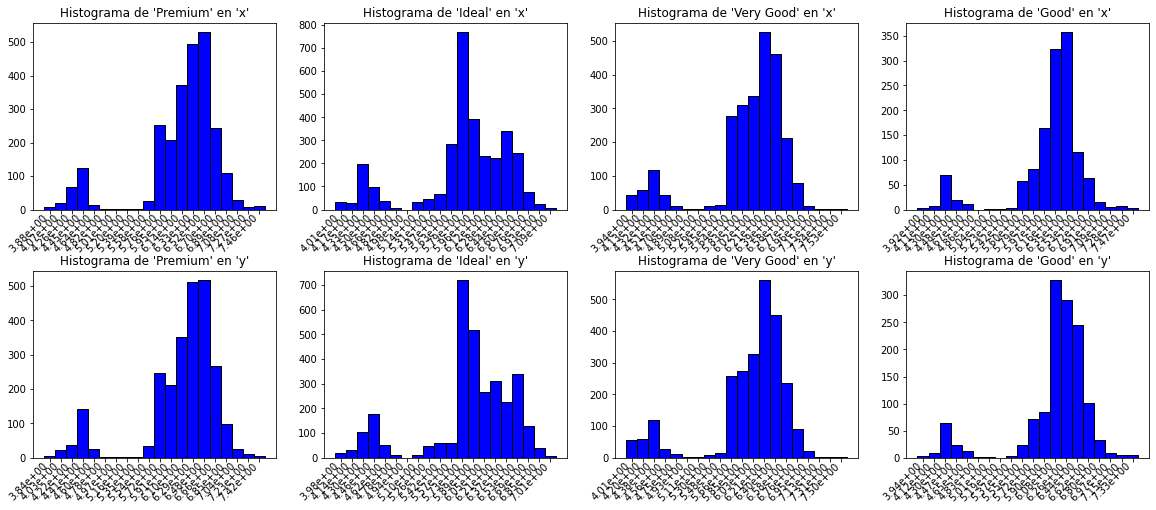

In [145]:
def good_cuts(attributes):
    plt.figure(figsize = (20, 8))
    plt.subplots_adjust(hspace = 0.33)
    which = ["Premium", "Ideal", "Very Good", "Good"]
    sets = [DIAMOND_DATA[DIAMOND_DATA["cut"] == i][["x", "y"]] for i in which]
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        histogram(sets[i % 4], attributes[i > 3], 20)
        plt.title(f"Histograma de '{which[i % 4]}' en '{attributes[i > 3]}'")
    return sets
DIAMOND_GOOD_CUTS = good_cuts(["x", "y"])

Ahora en la variable `DIAMOND_GOOD_CUTS` se encuentran almacenados los `DataFrame` para cada uno de los 4 cortes especificados en el enunciado, de esta forma, para analizar el resto de la información del conjunto de diamantes, calcularemos la matriz de distancias de los diamantes cuyo corte sea `Fair`.

A diferencia de como sugería el enunciado de calcular la matriz de distancias para los 9999 diamantes, usaremos los 503 diamantes restantes de categoría `Fair`, esto pues la diferencia de complejidad de ambas tareas en términos computacionales es abismal. Tal como fue presentado como una problemática en el foro de este curso, el cálculo de la matriz de distancias de 9999 entradas, tomaría cerca de 50 millones de llamadas a una función de distancia, y esto desde la perspectiva de que se desvirtúe dicho cálculo aprovechando la propiedad de que la matriz de distancias tiene información redundante en uno de sus triángulos frente al otro (la información del triángulo inferior es la misma que la del superior), e información conocida con su diagonal nula. Pero asumiendo el cálculo completo, serían exactamente 99.980.001 llamadas a una función de distancia, por lo que usando la información del foro como referencia, serían al menos 2 horas y media de ejecución. Como tanto mi lector como yo hemos de considerar valioso nuestro tiempo, no sería un gran plan llevar a cabo esta ejecución.

Por ello, con las 253.009 llamadas de los 503 diamantes en cuestión, y su respectiva ejecución que no debería tardar más de un minuto, podremos igualmente hacer un análisis sobre el conjunto de diamantes sin esperar tanto tiempo para poder concluir algo.

In [246]:
def distance_matrix(data, dist):
    result = []
    for i in range(data.shape[0]):
        result.append([])
        for j in range(data.shape[0]):
            result[i].append(dist(data[i].tolist()[0], data[j].tolist()[0]))
    return np.matrix(result)

DIAMOND_FINE = DIAMOND_DATA[DIAMOND_DATA["cut"] == "Fair"].copy()
DIAMOND_COV = np.matrix(DIAMOND_FINE.cov())
DIAMOND_FINE = np.matrix(DIAMOND_FINE.select_dtypes(["int64", "float64"]))

var = [DIAMOND_COV[i, i] for i in range(DIAMOND_COV.shape[0])]
d1 = lambda x, y: euclidean_dist(x, y)
d2 = lambda x, y: minkowski_dist(x, y, r = 3)
d3 = lambda x, y: mahalanobis_dist(x, y, var)

EUCLIDEAN_MATRIX = distance_matrix(DIAMOND_FINE, d1)
MINKOWSKI_MATRIX = distance_matrix(DIAMOND_FINE, d2)
MAHALANOBIS_MATRIX = distance_matrix(DIAMOND_FINE, d3)

Ahora con las tres matrices de distancias calculadas, podemos aprovechar todas estas distancias cuyo valor ya conocemos para mostrar que las tres funciones de distancia que hemos observado, son además métricas.

A continuación definimos una función para probar cada caso.

In [247]:
def metric_proof(matrix):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            if (matrix[i, j] < 0):
                print("Hay valores negativos")
                return False
            if (matrix[i, j] == 0 and i != j):
                if (not np.equal(DIAMOND_FINE[i], DIAMOND_FINE[j]).all()):
                    print("Hay distancias iguales a 0 entre puntos distintos")
                    return False
            if (matrix[i, j] != matrix[j, i]):
                print("La distancia d(x, y), no es igual a la de d(y, x)")
                return False
            k = (i + 1) % matrix.shape[0]
            k = k if k != j else (j + 1) % matrix.shape[0]
            if (matrix[i, k] + matrix[k, j] < matrix[i, j]):
                print("No se cumple la desigualdad triangular")
                return False
    return True

print(f"La distancia euclidiana es métrica? {metric_proof(EUCLIDEAN_MATRIX)}")
print(f"La distancia minkowski es métrica? {metric_proof(MINKOWSKI_MATRIX)}")
print(f"La distancia mahalanobis es métrica? {metric_proof(MAHALANOBIS_MATRIX)}")

La distancia euclidiana es métrica? True
La distancia minkowski es métrica? True
La distancia mahalanobis es métrica? True


Como podemos observar, todas las distancias son métricas, si analizamos línea a línea el algoritmo, podremos ver las 3 (subdivididas en 4) condiciones que una función distancia debe cumplir para ser una métrica siendo evaluadas para cada distancia calculada en la matriz. Si analizamos casos con r menor a 1 para la distancia de Minkowski podremos observar un caso en el cual no es métrica.

---

##**Parte 4**

Como pudimos ver a lo largo de este documento, la programación puede resultar especialmente útil para trabajar con grandes conjuntos de datos, esto se observa en los tiempos de ejecución ya que sumar más de 1000 datos para luego dividirlo en su total podría tomarnos varios minutos, si es que no horas. Ese cálculo de promedio pudo ser ejecutado para cada uno de los 12 atributos en ambos conjuntos de datos relacionados a los vinos en cuestión de milésimas de segundos gracias al poder computacional de la unidad de procesamiento de nuestro dispositivo. Luego de tal demostración de poder, resulta lógico considerar que de ahora en adelante no dudemos en usar sistemas computacionales para trabajar con muestras de datos como las observadas aquí.

De todos modos la información obtenida no fue interpretada mediante programación, pero como se ha anticipado para el progreso de este curso, la interpretación de parte de los datos también puede quedar en manos de estos poderosos dispositivos de la era digital. Es por eso, que no solo la fascinante teoría detrás del aprendizaje de máquinas es un motivo para estudiar esta área, sino que las múltiples aplicaciones prácticas que esta puede proveer, ya que el ahorro de tiempo que provee es esencial para dirigirse a objetivos más grandes, como lo puede ser un modelo de producción certero, generado a partir de la predictibilidad que nos puede dar un análisis de grandes cantidades de datos.

##**Referencias**

Para un uso integral de la estructura de datos proveída:

*    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

Para la interpretación de los atributos asociados a vinos:

*    https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html

Algo de información sobre los gráficos utilizados en este trabajo:

*    https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.bar.html

*    https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html